# Data Analysis for Software Engineers

# 1. Pandas Tutorual

<img src="img/pandas.png" width="600">

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Series

`Pandas` helps to work with tables in python. The basic structures are `Series` и `DataFrame`. <br/>
`Series` – indexed one-dimensional array of values.

It is possible to create `Series` with an array:

In [2]:
arr = np.random.rand(5)
ser = pd.Series(arr)

In [3]:
ser

0    0.457878
1    0.339410
2    0.924362
3    0.595285
4    0.817757
dtype: float64

Left column is index.

In [4]:
ser.index

RangeIndex(start=0, stop=5, step=1)

In [5]:
ser.values

array([0.4578781 , 0.33941039, 0.92436165, 0.59528505, 0.81775729])

In [6]:
# Take one element based on its index
ser[1]

0.33941039249610105

In [7]:
# Take several elements based on their positions
ser[0:2]

0    0.457878
1    0.339410
dtype: float64

One more example:

In [8]:
ser = pd.Series(np.random.rand(8), index=['s', 'o', 'f', 't', 'w', 'a', 'r', 'e'])

In [9]:
ser

s    0.932833
o    0.240201
f    0.730058
t    0.096222
w    0.671046
a    0.592342
r    0.761943
e    0.008440
dtype: float64

In [10]:
ser['s']

0.9328331750896421

In [11]:
ser['o':'t']

o    0.240201
f    0.730058
t    0.096222
dtype: float64

### Indexing

Indexing in `pandas` can be complicated :(

In [12]:
arr = np.random.rand(5)
ser = pd.Series(arr, index=[1,3,5,6,9])
ser

1    0.737744
3    0.470560
5    0.832489
6    0.095965
9    0.104861
dtype: float64

In [13]:
ser[3]

0.47056030149507233

In [14]:
ser[3:5] #?!

6    0.095965
9    0.104861
dtype: float64

In [15]:
ser.loc[3:5, ] # label-location based indexer

3    0.470560
5    0.832489
dtype: float64

In [16]:
ser.loc[:, ]

1    0.737744
3    0.470560
5    0.832489
6    0.095965
9    0.104861
dtype: float64

In [17]:
idx = ser > 0.5 # selection
ser.loc[idx, ]

1    0.737744
5    0.832489
dtype: float64

In [18]:
ser.iloc[3:5, ]

6    0.095965
9    0.104861
dtype: float64

In [19]:
idx = ser > 0.5
ser.loc[idx, ] = 0.5
ser

1    0.500000
3    0.470560
5    0.500000
6    0.095965
9    0.104861
dtype: float64

## DataFrame

`DataFrame` is indexed multidimentional array, where each column is `Series`.

In [20]:
df = pd.DataFrame(np.random.randn(10, 3),
                  index=range(10),
                  columns=['A', 'B', 'C'])

In [21]:
df.head(5) # the first 5 rows 

,A,B,C
0,-0.797119,2.850081,1.348230
1,0.358889,-0.201888,-0.355957
2,-0.547983,1.752860,1.420251
3,0.451282,-0.118147,0.274201
4,1.210965,1.082011,0.271754


In [22]:
print ("Index: ", df.index)
print ("Columns: ", df.columns)

Index:  RangeIndex(start=0, stop=10, step=1)
Columns:  Index(['A', 'B', 'C'], dtype='object')


In [23]:
df.loc[1:3, ['A', 'B']]

,A,B
1,0.358889,-0.201888
2,-0.547983,1.752860
3,0.451282,-0.118147


In [24]:
df.iloc[1:3, 0:2]

,A,B
1,0.358889,-0.201888
2,-0.547983,1.752860


In [25]:
df.T

,0,1,2,3,4,5,6,7,8,9
A,-0.797119,0.358889,-0.547983,0.451282,1.210965,0.450348,0.655483,0.356339,-0.469304,-1.610204
B,2.850081,-0.201888,1.752860,-0.118147,1.082011,-0.729865,-0.660877,-0.623153,1.100526,-0.507056
C,1.348230,-0.355957,1.420251,0.274201,0.271754,2.063872,0.668826,-1.296846,0.052266,0.139381


In [26]:
# Short statistics report
df.describe() 

,A,B,C
count,10.000000,10.000000,10.000000
mean,0.005869,0.394449,0.458598
std,0.837104,1.233382,0.967145
min,-1.610204,-0.729865,-1.296846
25%,-0.528313,-0.594129,0.074045
50%,0.357614,-0.160018,0.272977
75%,0.451048,1.095897,1.178379
max,1.210965,2.850081,2.063872


Aggregation (on columns by default)

In [27]:
df.mean()

A    0.005869
B    0.394449
C    0.458598
dtype: float64

In [28]:
df.A.mean()

0.0058694724426543885

Type convertion

In [29]:
df.A = df.A.astype(int)
df.head()

,A,B,C
0,0,2.850081,1.348230
1,0,-0.201888,-0.355957
2,0,1.752860,1.420251
3,0,-0.118147,0.274201
4,1,1.082011,0.271754


In [30]:
print ('Number of unique values in column А = %d' % df.A.nunique())

Number of unique values in column А = 3


In [31]:
print ('The largest value in column B :')
print (df.B.nlargest(2))

The largest value in column B :
0    2.850081
2    1.752860
Name: B, dtype: float64


Several types in one column:

In [32]:
df.dtypes

A      int64
B    float64
C    float64
dtype: object

In [33]:
df.loc[0, 'A'] = 'lalaley'
df.head()

,A,B,C
0,lalaley,2.850081,1.348230
1,0,-0.201888,-0.355957
2,0,1.752860,1.420251
3,0,-0.118147,0.274201
4,1,1.082011,0.271754


In [34]:
df.dtypes

A     object
B    float64
C    float64
dtype: object

Edit `DataFrame`:

In [35]:
df

,A,B,C
0,lalaley,2.850081,1.348230
1,0,-0.201888,-0.355957
2,0,1.752860,1.420251
3,0,-0.118147,0.274201
4,1,1.082011,0.271754
5,0,-0.729865,2.063872
6,0,-0.660877,0.668826
7,0,-0.623153,-1.296846
8,0,1.100526,0.052266
9,-1,-0.507056,0.139381


In [36]:
df.drop(0, axis=0)
# df did not changed!

,A,B,C
1,0,-0.201888,-0.355957
2,0,1.752860,1.420251
3,0,-0.118147,0.274201
4,1,1.082011,0.271754
5,0,-0.729865,2.063872
6,0,-0.660877,0.668826
7,0,-0.623153,-1.296846
8,0,1.100526,0.052266
9,-1,-0.507056,0.139381


In [37]:
df.drop('A', axis=1)

,B,C
0,2.850081,1.348230
1,-0.201888,-0.355957
2,1.752860,1.420251
3,-0.118147,0.274201
4,1.082011,0.271754
5,-0.729865,2.063872
6,-0.660877,0.668826
7,-0.623153,-1.296846
8,1.100526,0.052266
9,-0.507056,0.139381


In [38]:
df.loc[:, 'D'] = np.nan
df.head()

,A,B,C,D
0,lalaley,2.850081,1.348230,NaN
1,0,-0.201888,-0.355957,NaN
2,0,1.752860,1.420251,NaN
3,0,-0.118147,0.274201,NaN
4,1,1.082011,0.271754,NaN


In [39]:
df.loc[10, :] = 0
df.tail()

,A,B,C,D
6,0,-0.660877,0.668826,NaN
7,0,-0.623153,-1.296846,NaN
8,0,1.100526,0.052266,NaN
9,-1,-0.507056,0.139381,NaN
10,0,0.000000,0.000000,0.0


# 2. Pandas with Real Data

### LAD and Academic Performance

[Article](http://www.ncbi.nlm.nih.gov/pubmed/5676802) Correlation of Performance Test Scores with Tissue Concentration of Lysergic Acid Diethylamide in Human Subjects was published in 1968. 

There was a [sample](https://www.dropbox.com/s/ui14yeeckbc6z7c/drugs-and-math.csv?dl=0) with 7 observables.

In [40]:
df = pd.read_csv('drugs-and-math.csv', 
                 index_col=0, 
                 sep=',')

In [41]:
df.head()

,Drugs,Score
0,1.17,78.93
1,2.97,58.20
2,3.26,67.47
3,4.69,37.47
4,5.83,45.65


In [42]:
print (df.shape)
print (df.columns)
print (df.index)

(7, 2)
Index(['Drugs', 'Score'], dtype='object')
Int64Index([0, 1, 2, 3, 4, 5, 6], dtype='int64')


Lets sort the DataFrame by Score

In [43]:
df = df.sort_values('Score', ascending=False)

In [44]:
df.head()

,Drugs,Score
0,1.17,78.93
2,3.26,67.47
1,2.97,58.20
4,5.83,45.65
3,4.69,37.47


In [45]:
df.describe().T # Иногда так лучше

,count,mean,std,min,25%,50%,75%,max
Drugs,7.0,4.332857,1.935413,1.17,3.115,4.69,5.915,6.41
Score,7.0,50.087143,18.610854,29.97,35.195,45.65,62.835,78.93


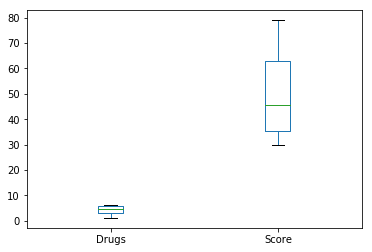

In [46]:
df.plot(kind='box')

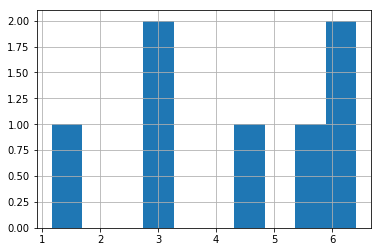

In [47]:
df.Drugs.hist()

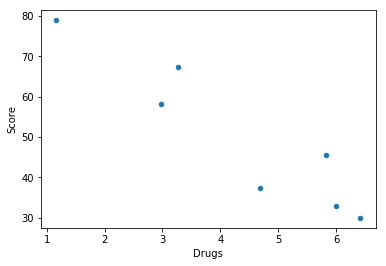

In [48]:
# df.plot(x='Drugs', y='Score')
df.plot(x='Drugs', y='Score', kind='scatter')

### Birth rate in the USA (2 points)

Download two samples with information about birth rate in the USA: [Sample 1](https://www.dropbox.com/s/4v743y3e25lz0an/US_births_1994-2003_CDC_NCHS.csv?dl=0), [Sample 2](https://www.dropbox.com/s/3aoulbiuomamay6/US_births_2000-2014_SSA.csv?dl=0)

In [49]:
df1 = pd.read_csv('US_births_1994-2003_CDC_NCHS.csv', sep=',')
df2 = pd.read_csv('US_births_2000-2014_SSA.csv')

In [50]:
df1.head()

,year,month,date_of_month,day_of_week,births
0,1994,1,1,6,8096
1,1994,1,2,7,7772
2,1994,1,3,1,10142
3,1994,1,4,2,11248
4,1994,1,5,3,11053


Function `pd.to_datetime()` allows to convert raw time data into special time format `Timestamp`. There are several way how to do that:

In [51]:
print (pd.to_datetime('2016-03-01', format='%Y-%m-%d'))
print (pd.to_datetime('01032016', format='%d%m%Y'))
print (pd.to_datetime('01-mar-2016', format='%d-%b-%Y'))

2016-03-01 00:00:00
2016-03-01 00:00:00
2016-03-01 00:00:00


We have several columns with time information (year, month, day).

For `pd.to_datetime()` we have to take 3 columns that **must** have names `['year', 'month', 'day']`

In [52]:
# rename column
df1 = df1.rename(columns={'date_of_month': 'day'})

# create new column with date
df1.loc[:, 'date'] = pd.to_datetime(df1.loc[:, ['year', 'month', 'day']])
df1.head()

,year,month,day,day_of_week,births,date
0,1994,1,1,6,8096,1994-01-01
1,1994,1,2,7,7772,1994-01-02
2,1994,1,3,1,10142,1994-01-03
3,1994,1,4,2,11248,1994-01-04
4,1994,1,5,3,11053,1994-01-05


Lets take `date` as index of the dataframe:

In [53]:
df1 = df1.set_index('date')
df1.head()

,year,month,day,day_of_week,births
date,,,,,
1994-01-01,1994,1,1,6,8096
1994-01-02,1994,1,2,7,7772
1994-01-03,1994,1,3,1,10142
1994-01-04,1994,1,4,2,11248
1994-01-05,1994,1,5,3,11053


In [54]:
df1

,year,month,day,day_of_week,births
date,,,,,
1994-01-01,1994,1,1,6,8096
1994-01-02,1994,1,2,7,7772
1994-01-03,1994,1,3,1,10142
1994-01-04,1994,1,4,2,11248
1994-01-05,1994,1,5,3,11053
1994-01-06,1994,1,6,4,11406
1994-01-07,1994,1,7,5,11251
1994-01-08,1994,1,8,6,8653
1994-01-09,1994,1,9,7,7910


So we can select data based on date:

In [55]:
df1.loc['1994-01-01', :]

year           1994
month             1
day               1
day_of_week       6
births         8096
Name: 1994-01-01 00:00:00, dtype: int64

In [56]:
df1.loc['1994-01-01':'1995-01-01', :]

,year,month,day,day_of_week,births
date,,,,,
1994-01-01,1994,1,1,6,8096
1994-01-02,1994,1,2,7,7772
1994-01-03,1994,1,3,1,10142
1994-01-04,1994,1,4,2,11248
1994-01-05,1994,1,5,3,11053
1994-01-06,1994,1,6,4,11406
1994-01-07,1994,1,7,5,11251
1994-01-08,1994,1,8,6,8653
1994-01-09,1994,1,9,7,7910


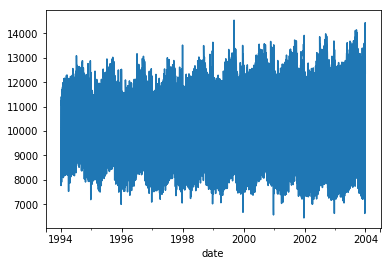

In [57]:
# Визуализация
df1.births.plot(label=u'Исходный ряд')

### Wine Quality (2 points)

Download [sample](https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv) with information about wine characteristics and its quality.

In [58]:
## Your code here

**Task**<br/>
* How much objects are in the sample?
* What features describe the objects? How much these features?
* What is feature a target variable?
* What are their ranges?
* Are there any missing values?

In [59]:
## Your code and answers here

**Task**<br/>
What features affect the target variable the most?

In [60]:
## Your code here